# OUTLINE
We will put those results into a Pandas `DataFrame`, which we will use to select stars near the centerline of GD-1.

Plotting the proper motion of those stars, we will identify a region of proper motion for stars that are likely to be in GD-1.

Finally, we will select and plot the stars whose proper motion is in that region.

In [2]:
import astropy.units as u
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# reading back the file
filename = 'gd1_data.hdf'
results_df = pd.read_hdf(filename, 'results_df')

In [4]:
results_df.describe()

,source_id,ra,dec,pmra,pmdec,parallax,phi1,phi2,pm_phi1,pm_phi2
count,1.403390e+05,140339.000000,140339.000000,140339.000000,140339.000000,140339.000000,140339.000000,140339.000000,140339.000000,140339.000000
mean,6.792399e+17,143.823122,26.780285,-2.484404,-6.100777,0.179492,-50.091158,-1.803301,-0.868963,1.409208
std,3.792177e+16,3.697850,3.052592,5.913939,7.202047,0.759590,2.892344,3.444398,6.657714,6.518615
min,6.214900e+17,135.425699,19.286617,-106.755260,-138.065163,-15.287602,-54.999989,-8.029159,-115.275637,-161.150142
25%,6.443517e+17,140.967966,24.592490,-5.038789,-8.341561,-0.035981,-52.602952,-4.750426,-2.948723,-1.107128
50%,6.888060e+17,143.734409,26.746261,-1.834943,-4.689596,0.362708,-50.147362,-1.671502,0.585037,1.987149
75%,6.976579e+17,146.607350,28.990500,0.452893,-1.937809,0.657637,-47.593279,1.160514,3.001768,4.628965
max,7.974418e+17,152.777393,34.285481,104.319923,20.981070,0.999957,-44.999985,4.014609,39.802471,79.275199


Note:
The most noticeable issue is that some of the parallax values are negative, which seems non-physical.

Negative parallaxes in the Gaia database can arise from a number of causes like source confusion (high negative values) and the parallax zero point with systematic errors (low negative values).

Fortunately, we do not use the parallax measurements in the analysis (one of the reasons we used constant distance for reflex correction).

# Plot Proper Motion

<img src="/Users/darykevin/Documents/Python Scripts/Computational Cosmology/Project GD 1/proper.png" alt="Alternative text" width="900" height="300" />

In this figure, the shaded area identifies stars that are likely to be in GD-1 because:

Due to the nature of tidal streams, we expect the proper motion for stars in GD-1 to be along the axis of the stream; that is, we expect motion in the direction of `phi2` to be near 0.

In the direction of `phi1`, we do not have a prior expectation for proper motion, except that it should form a cluster at a non-zero value.

By plotting proper motion in the GD-1 frame, we hope to find this cluster. Then we will use the bounds of the cluster to select stars that are more likely to be in GD-1.

The following figure is a scatter plot of proper motion, in the GD-1 frame, for the stars in `results_df`.

Text(0, 0.5, 'Proper motion phi2 (mass/yr GD1 frame)')

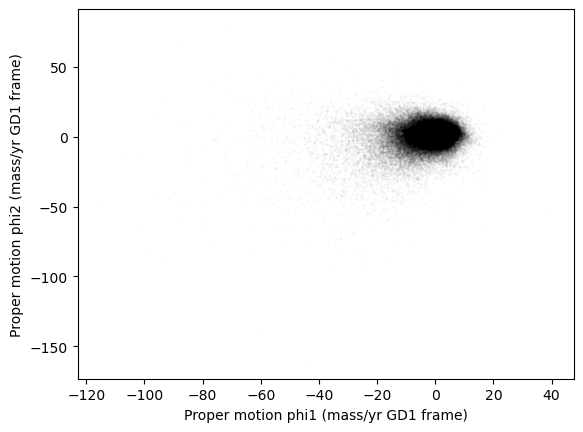

In [5]:
x=results_df['pm_phi1']
y=results_df['pm_phi2']

plt.plot(x, y, 'ko', markersize=0.2, alpha=0.1)
plt.xlabel('Proper motion phi1 (mass/yr GD1 frame)')
plt.ylabel('Proper motion phi2 (mass/yr GD1 frame)')

Most of the proper motions are near the origin, but there are a few extreme values. Following the example in the paper, we will use xlim and ylim to zoom in on the region near the origin.

(-10.0, 10.0)

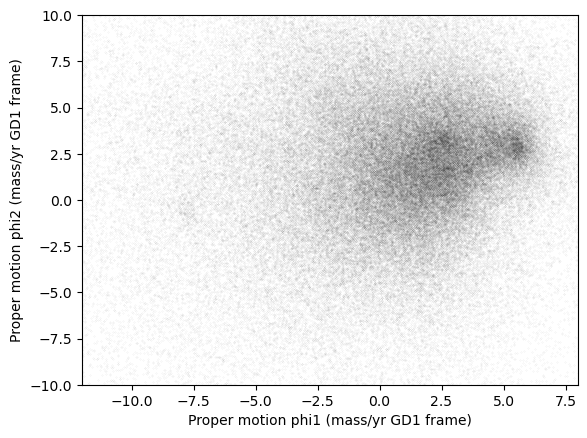

In [6]:
x=results_df['pm_phi1']
y=results_df['pm_phi2']

plt.plot(x, y, 'ko', markersize=0.2, alpha=0.1)
plt.xlabel('Proper motion phi1 (mass/yr GD1 frame)')
plt.ylabel('Proper motion phi2 (mass/yr GD1 frame)')

plt.xlim(-12, 8)
plt.ylim(-10, 10)

To see the cluster more clearly, we need a sample that contains a higher proportion of stars in GD-1. We will do that by selecting stars close to the centerline.

## Selecting the centerline

<img src="/Users/darykevin/Documents/Python Scripts/Computational Cosmology/Project GD 1/center.png" alt="Alternative text" width="1100" height="300" />

As we can see in the following figure, many stars in GD-1 are less than 1 degree from the line `phi2`=0.

Stars near this line have the highest probability of being in GD-1.

To select them, we will use a “Boolean mask”. We will start by selecting the `phi2` column from the `DataFrame`:

In [7]:
phi2=results_df['phi2']

In [8]:
phi2_min= -1.0 * u.degree
phi2_max= 1.0 * u.degree

mask=(phi2 > phi2_min) & (phi2 < phi2_max)

In [9]:
mask.head()

0    False
1    False
2    False
3    False
4    False
Name: phi2, dtype: bool

In [10]:
mask.sum() # This tells us how many stars are there in the selected region

25084

In [11]:
centerline_df=results_df[mask]

`centerline_df` is a `DataFrame` that contains only the rows from `results_df` that correspond to `True` values in `mask`. So it contains the stars near the centerline of GD-1.

We can use `len` to see how many rows are in `centerline_df`:

In [12]:
len(centerline_df)

25084

In [13]:
len(centerline_df)/len(results_df) # to know what fraction of rows have been selected

0.1787386257562046

There are about 25,000 stars in this region, about 18% of the total

Now since mask is done we can plot the proper motion once again but this time we will write a fucntion since we will have to use it again

In [14]:
def plot_proper_motion(df):
    """Plot proper motion.
    
    df: DataFrame with `pm_phi1` and `pm_phi2`
    """
    x = df['pm_phi1']
    y = df['pm_phi2']
    plt.plot(x, y, 'ko', markersize=0.3, alpha=0.3)

    plt.xlabel('Proper motion phi1 (mas/yr)')
    plt.ylabel('Proper motion phi2 (mas/yr)')

    plt.xlim(-12, 8)
    plt.ylim(-10, 10)

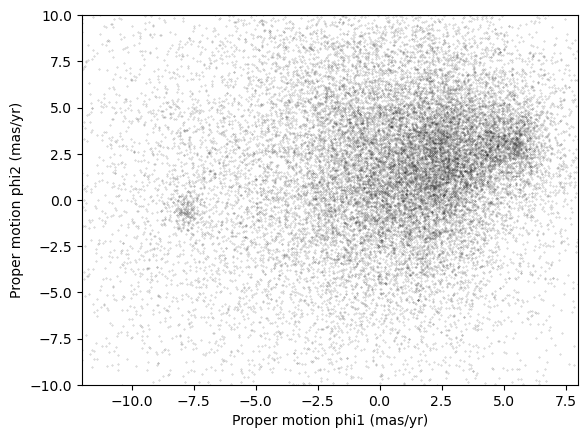

In [15]:
plot_proper_motion(centerline_df)

Now we can see more clearly that there is a cluster near (-7.5, 0).

## Filtering based on proper motion

The next step is to select stars in the “overdense” region of proper motion, which are candidates to be in GD-1.

We will use a simple rectangle for now, but in a later lesson we will see how to select a polygonal region as well.

<img src="/Users/darykevin/Documents/Python Scripts/Computational Cosmology/Project GD 1/filter.png" alt="Alternative text" width="900" height="300" />

Here are bounds on proper motion we chose by eye:

In [16]:
pm1_min = -8.9
pm1_max = -6.9
pm2_min = -2.2
pm2_max =  1.0

In [17]:
def make_rectangle(x1, x2, y1, y2):
    """Return the corners of a rectangle."""
    xs = [x1, x1, x2, x2, x1]
    ys = [y1, y2, y2, y1, y1]
    return xs, ys

In [18]:
pm1_rect, pm2_rect = make_rectangle(pm1_min, pm1_max, pm2_min, pm2_max)

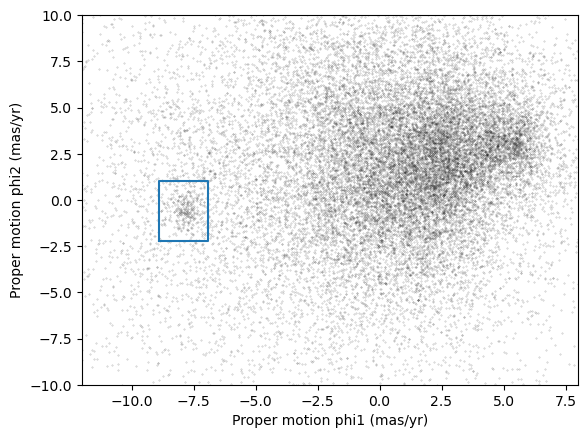

In [19]:
plot_proper_motion(centerline_df)
plt.plot(pm1_rect, pm2_rect, '-')

Now that we have identified the bounds of the cluster in proper motion, we will use it to select rows from `results_df`.

We will use the following function, which uses Pandas operators to make a mask that selects rows where `series` falls between `low `and `high`.

In [20]:
def between(series, low, high):
    """Check whether values are between `low` and `high`."""
    return (series > low) & (series < high)

In [21]:
pm1=results_df['pm_phi1']
pm2=results_df['pm_phi2']
pm_mask=(between(pm1, pm1_min, pm1_max) & between(pm2, pm2_min, pm2_max))

In [22]:
pm_mask.sum()

1049

Now we can use this mask to select rows from `results_df`:

In [23]:
selected_df=results_df[pm_mask]
len(selected_df)

1049

These are the stars we think are likely to be in GD-1. We can inspect these stars, plotting their coordinates (not their proper motion).

Text(0, 0.5, 'phi2 (degree GD1)')

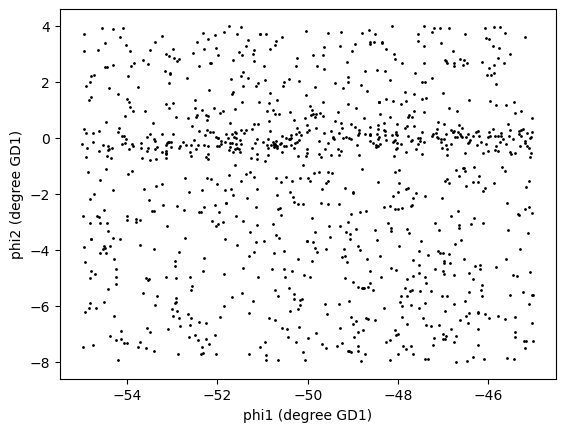

In [24]:
x = selected_df['phi1']
y = selected_df['phi2']
plt.plot(x, y, 'ko', markersize=1, alpha=1)

plt.xlabel('phi1 (degree GD1)')
plt.ylabel('phi2 (degree GD1)')

Now that is starting to look like a tidal stream!

To clean up the plot a little bit we can add two new Matplotlib commands:

* `axis` with the parameter `equal` sets up the axes so a unit is the same size along the `x `and `y `axes.

* `title` puts the input string as a title at the top of the plot. The `fontsize` keyword sets the fontsize to be `medium`, a little smaller than the default `large.`

In an example like this, where `x` and `y` represent coordinates in space, equal axes ensures that the distance between points is represented accurately. Since we are now constraining the relative proportions of our axes, the data may not fill the entire figure.

(-55.4928032130903, -44.503699550734694, -8.606246809552179, 4.601299340488258)

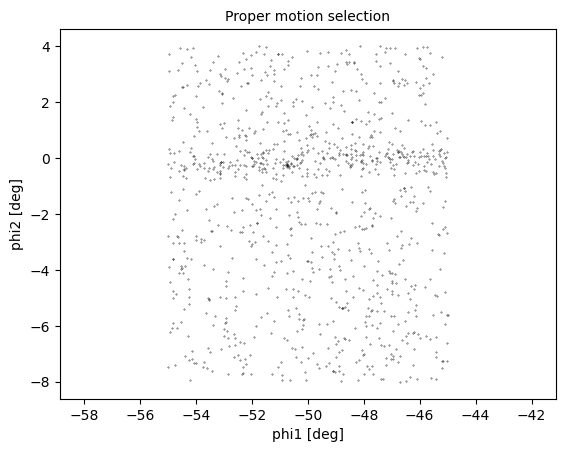

In [26]:
# Replotting
x = selected_df['phi1']
y = selected_df['phi2']

plt.plot(x, y, 'ko', markersize=0.3, alpha=0.9)

plt.xlabel('phi1 [deg]')
plt.ylabel('phi2 [deg]')
plt.title('Proper motion selection', fontsize='medium')

plt.axis('equal')

### FUNCTION 

In [ ]:
def plot_pm_selection(df):
    """Plot in GD-1 spatial coordinates the location of the stars
    selected by proper motion
    """
    x = df['phi1']
    y = df['phi2']

    plt.plot(x, y, 'ko', markersize=0.3, alpha=0.3)

    plt.xlabel('phi1 [deg]')
    plt.ylabel('phi2 [deg]')
    plt.title('Proper motion selection', fontsize='medium')

    plt.axis('equal')

In [ ]:
#plot_pm_selection(selected_df)

# Saving the Data Frame

We are going to need both `selected_df` and `centerline_df` and hence dave both. 

In [27]:
filename = 'gd1_data.hdf'

selected_df.to_hdf(filename, 'selected_df')

In [28]:
centerline_df.to_hdf(filename, 'centerline_df')

Because an HDF5 file can contain more than one Dataset, we have to provide a name, or “key”, that identifies the Dataset in the file.